In [4]:
# import necessary libraries

import numpy as np
from poly_reg import PolynomialRegression
import pickle
import matplotlib.pyplot as plt

def load_pkl(filename):
    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)
    return loaded_data

In [5]:
def load_dataset(id):
    """
    Args:
        - id (int): The id of the dataset to load.

    Returns:
        - datasets (dict): The small and large train plus test datasets for the given id.
    """
    dataset_dir = f"datasets_{id}"
    datasets = {
        "small_train": load_pkl(f"{dataset_dir}/small_train.pkl"),
        "medium_train": load_pkl(f"{dataset_dir}/medium_train.pkl"),
        "large_train": load_pkl(f"{dataset_dir}/large_train.pkl"),
        "test": load_pkl(f"{dataset_dir}/test.pkl")
    }
    return datasets

In [6]:
def data_size_experiment(datasets):
    # keep K fixed
    K = 10
    model = PolynomialRegression(K=K) # model

    train_dataset_list = ["small_train", "medium_train", "large_train"] # three datasets
    n_samples = np.zeros(len(train_dataset_list), dtype=int)
    train_loss = np.zeros(len(train_dataset_list), dtype=float)
    test_loss = np.zeros(len(train_dataset_list), dtype=float)

    # test data
    test_dataset = datasets["test"]
    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, train_dataset in enumerate(train_dataset_list): # iterate over three datasets
        train_dataset = datasets[train_dataset]
        train_X = train_dataset["X"]
        train_Y = train_dataset["Y"]
        model.fit(train_X, train_Y) # least squares fit
        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
        n_samples[i] = len(train_X) 
    return train_loss, test_loss, n_samples

<Figure size 640x480 with 0 Axes>

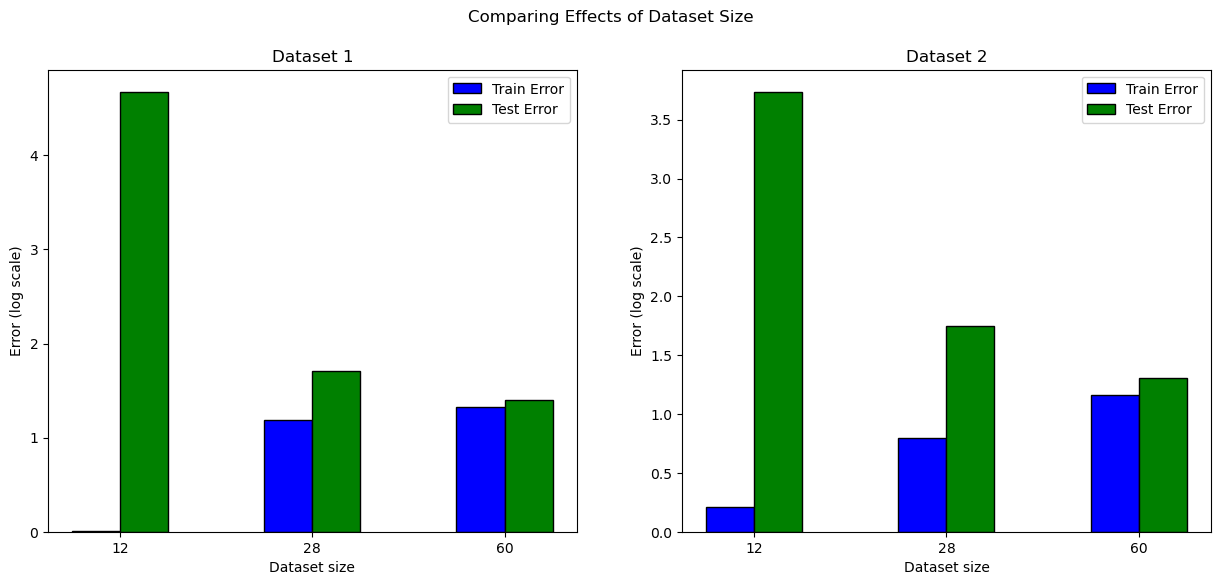

In [7]:
width = 0.25
plt.clf()
data_ids = [1, 2] # two benchmarks
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for i, data_id in enumerate(data_ids):
    datasets = load_dataset(data_id) # load data
    train_loss, test_loss, n_samples = data_size_experiment(datasets=datasets) # run the experiment
    r = np.arange(len(n_samples))
    axs[i].bar(r, np.log(train_loss+1), color = 'b', width = width, edgecolor = 'black', label='Train Error')
    axs[i].bar(r + width, np.log(test_loss+1), color = 'g', width = width, edgecolor = 'black', label='Test Error')
    axs[i].set_xticks(ticks=r + width/2, labels=n_samples)
    axs[i].set_xlabel("Dataset size")
    axs[i].set_ylabel("Error (log scale)")
    axs[i].set_title(f"Dataset {data_id}")
    axs[i].legend()
plt.suptitle("Comparing Effects of Dataset Size")
plt.show()

In [8]:
def complexity_experiment(train_dataset, test_dataset):
    Ks = np.arange(1, 11) # 1 <= K <= 10
    train_loss = np.zeros(len(Ks), dtype=float)
    test_loss = np.zeros(len(Ks), dtype=float)

    train_X = train_dataset["X"]
    train_Y = train_dataset["Y"]

    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, K in enumerate(Ks):
        model = PolynomialRegression(K) # model with different Ks
        model.fit(train_X, train_Y) # least squares fit

        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
    return train_loss, test_loss, Ks

<Figure size 640x480 with 0 Axes>

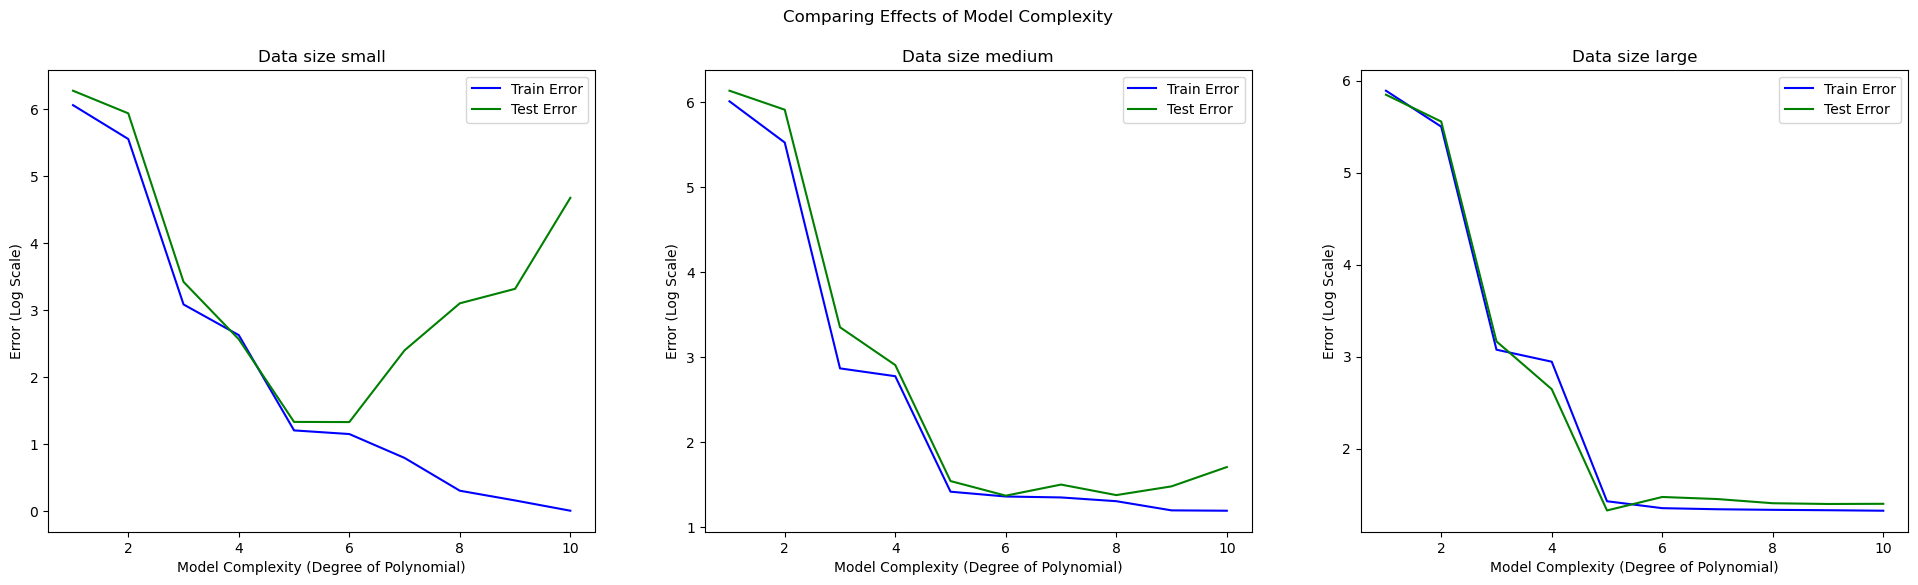

In [9]:
data_id = 1
datasets = load_dataset(data_id) # first benchmark
test_dataset = datasets["test"]
data_sizes = ["small", "medium", "large"]
plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
for i, data_size in enumerate(data_sizes): # iterate over three datasets
    train_dataset = datasets[f"{data_size}_train"]
    train_loss, test_loss, Ks = complexity_experiment(train_dataset, test_dataset) # run the experiment
    axs[i].plot(Ks, np.log(train_loss+1), color = 'b', label='Train Error')
    axs[i].plot(Ks, np.log(test_loss+1), color = 'g', label='Test Error')
    axs[i].set_xlabel("Model Complexity (Degree of Polynomial)")
    axs[i].set_ylabel("Error (Log Scale)")
    axs[i].set_title(f"Data size {data_size}")
    axs[i].legend()
plt.suptitle("Comparing Effects of Model Complexity")
plt.show()

In [11]:
def regularization_experiment(train_dataset, test_dataset):
    K = 10 # keep K fixed
    l2_coeffs = np.linspace(0, 1.5, 20) # regularization coefficient

    train_loss = np.zeros(len(l2_coeffs), dtype=float)
    test_loss = np.zeros(len(l2_coeffs), dtype=float)

    train_X = train_dataset["X"]
    train_Y = train_dataset["Y"]

    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, l2_coeff in enumerate(l2_coeffs): # iterate over different l2 coefficients
        model = PolynomialRegression(K, l2_coeff)
        model.fit_with_l2_regularization(train_X, train_Y) # fit with l2 regularization

        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
        
    return train_loss, test_loss, l2_coeffs

<Figure size 640x480 with 0 Axes>

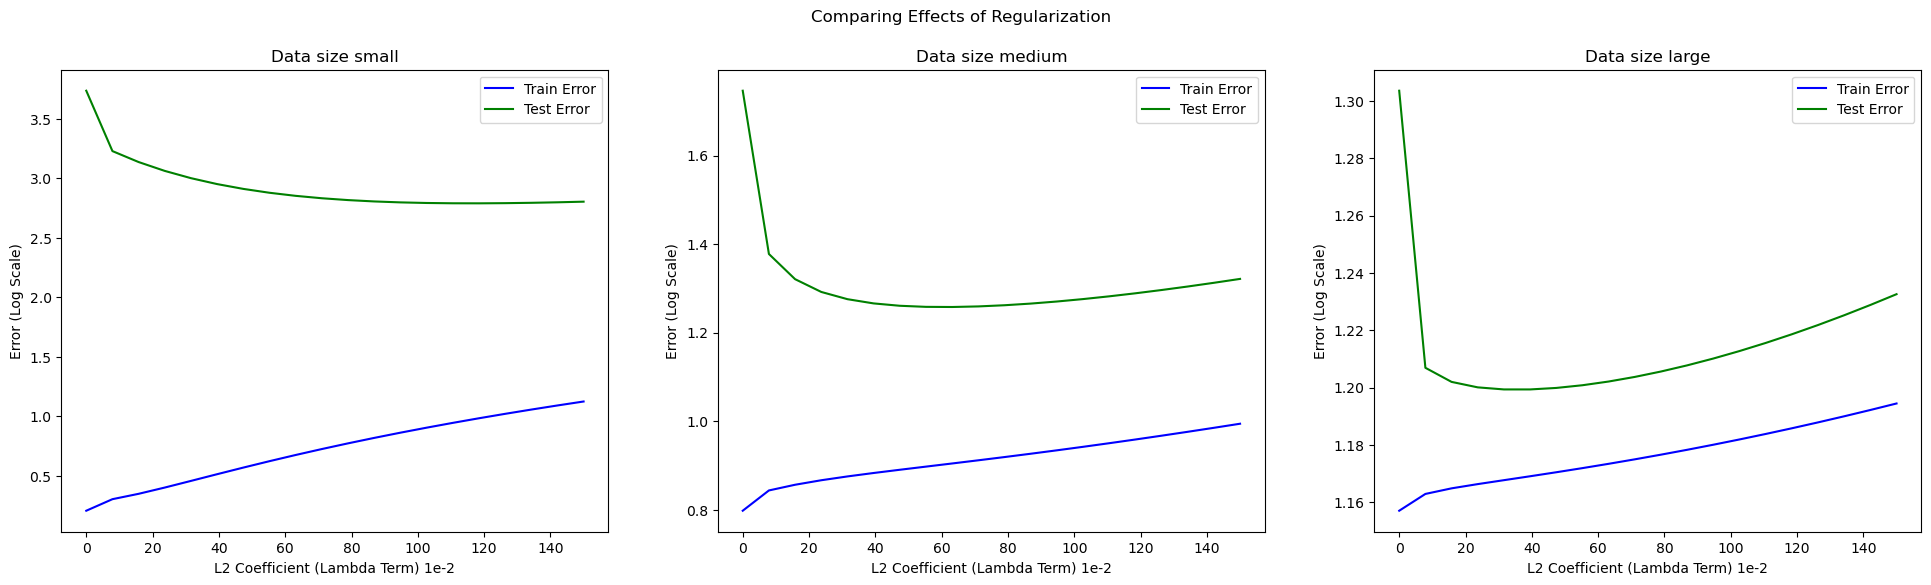

In [12]:
data_id = 2
datasets = load_dataset(data_id) # second benchmark
test_dataset = datasets["test"]

data_sizes = ["small", "medium", "large"]
plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
for i, data_size in enumerate(data_sizes): # iterate over three datasets
    train_dataset = datasets[f"{data_size}_train"]
    train_loss, test_loss, l2_coeffs = regularization_experiment(train_dataset, test_dataset) # run the experiment
    axs[i].plot(l2_coeffs * 1e2, np.log(train_loss+1), color = 'b', label='Train Error')
    axs[i].plot(l2_coeffs * 1e2, np.log(test_loss+1), color = 'g', label='Test Error')
    axs[i].set_title(f"Data size {data_size}")
    axs[i].set_xlabel("L2 Coefficient (Lambda Term) 1e-2")
    axs[i].set_ylabel("Error (Log Scale)")
    axs[i].legend()
plt.suptitle("Comparing Effects of Regularization")
plt.show()